### 헬스케어 - 질병 데이터 분석 (코로나 바이러스)
코로나 바이러스 데이터 분석 - 환경 설정 및 데이터 구조 파악

라이브러리 로딩

In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
# colab 에서 csv 파일 업로드 방법
from google.colab import files
uploaded = files.upload()

In [11]:
pd.read_csv("./data/bank-additional-full.csv", sep=";")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


데이터 읽어오기

In [6]:
coronaDF = pd.read_csv('./data/covid_19_clean_complete.csv')

### Columns
Province/StateProvince/State  
Country/RegionCountry/Region  
LatLatitude of the location  
LongLongitude of the location  
DateDate of cumulative report  
ConfirmedCumulative number of confirmed cases till this day  
DeathsCumulative number of deaths till this day  
RecoveredCumulative number of recovered cases till this day  

In [7]:
coronaDF.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [8]:
# 결측 값 확인
coronaDF.isnull().sum()

Province/State    14924
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [9]:
# 데이터 타입 조회
coronaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21484 entries, 0 to 21483
Data columns (total 8 columns):
Province/State    6560 non-null object
Country/Region    21484 non-null object
Lat               21484 non-null float64
Long              21484 non-null float64
Date              21484 non-null object
Confirmed         21484 non-null int64
Deaths            21484 non-null int64
Recovered         21484 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.3+ MB


### Date 정보 수정 (Object => datetime)

In [12]:
coronaDF['Date'] = pd.to_datetime(coronaDF['Date'])
coronaDF.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


### 국가별 최신 확진자, 사망자, 회복자 데이터 분석

In [13]:
# 최신 데이터만 남기기
latestDF = coronaDF[coronaDF['Date'] == max(coronaDF['Date'])]

In [15]:
# 국가별 합계 구하기
latest_country_sum = latestDF.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
latest_country_sum.head()

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,607,18,32
1,Albania,446,23,217
2,Algeria,1914,293,591
3,Andorra,638,29,128
4,Angola,19,2,4


In [16]:
# 사망자 높은 국가순으로 정렬
latest_country_sum = latest_country_sum.sort_values(by='Deaths', ascending=False).reset_index(drop=True)
latest_country_sum

,Country/Region,Confirmed,Deaths,Recovered
0,US,555313,22020,32988
1,Italy,156363,19899,34211
2,Spain,166831,17209,62391
3,France,133670,14412,27469
4,United Kingdom,85206,10629,626
...,...,...,...,...
180,Holy See,8,0,2
181,South Sudan,4,0,0
182,Chad,18,0,2
183,Laos,19,0,0


In [17]:
latest_country_sum.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,US,555313,22020,32988
1,Italy,156363,19899,34211
2,Spain,166831,17209,62391
3,France,133670,14412,27469
4,United Kingdom,85206,10629,626
5,Iran,71686,4474,43894
6,Belgium,29647,3600,6463
7,China,83134,3343,77956
8,Germany,127854,3022,60300
9,Netherlands,25743,2747,295


### 시간에 따른 확진자, 사망자, 회복자 분석

In [18]:
# 날짜별 확진자, 사망자, 회복자 합계 구하기
date_status = coronaDF.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()
date_status = date_status.sort_index()
date_status

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-04-08,1511102,88338,324502
2020-04-09,1595348,95455,348808
2020-04-10,1691717,102525,370234


### 시간에 따른 누적 확진자, 사망자, 회복자 그래프 (seaborn lineplot)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


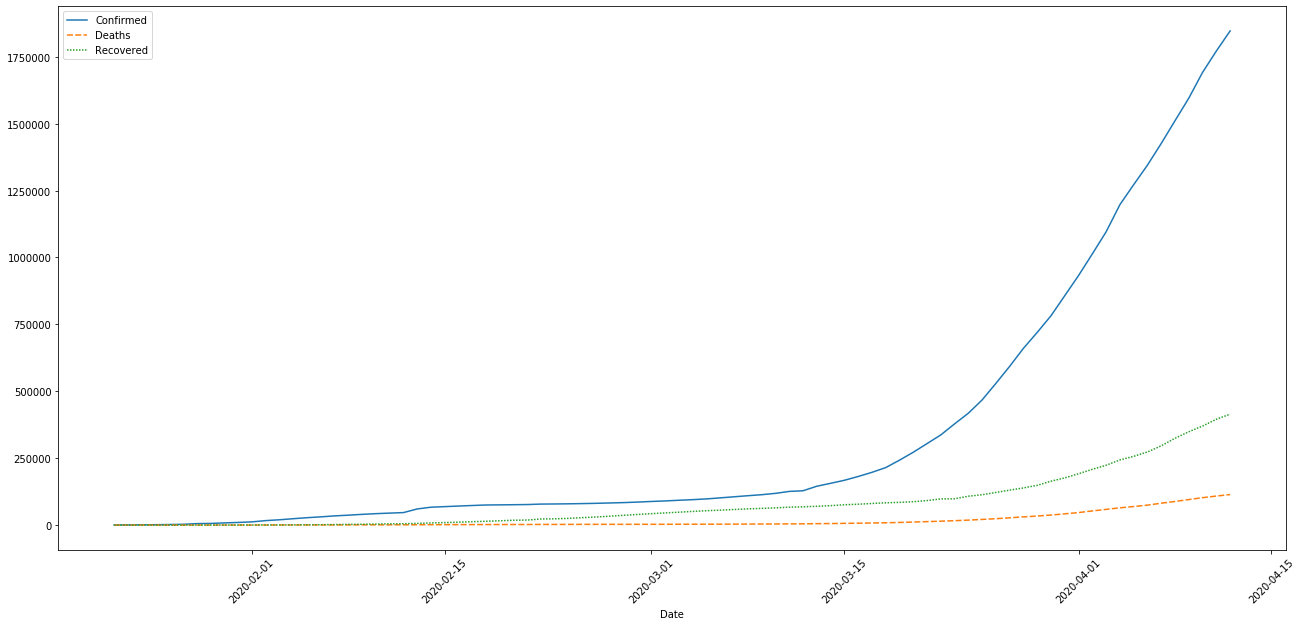

In [20]:
plt.figure(figsize=(22, 10))
plt.xticks(rotation= 45)
sns.lineplot(data=date_status)

### 전세계 코로나 바이러스 감염 지도 표시 - FOLIUM

In [21]:
import folium
m = folium.Map()
m

In [26]:
m = folium.Map(location=[0, 0], zoom_start=4)
for n in latestDF.index:
    folium.CircleMarker([latestDF['Lat'][n], latestDF['Long'][n]] # 경도, 위도
                       , radius=int(latestDF['Confirmed'][n]/10000) # 서클 지름
                       , color='red', fill='True', fill_color='red' # 서클 색, 채우기, 채우는 색
                       , popup=latestDF['Country/Region'][n] + ":" + str(latestDF['Confirmed'][n])).add_to(m)
                        # popup 마우스 오버시 출력돼는 정보
m